In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import numpy as np

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df
x=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [3]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [12]:
def bisecting_kmeans(x,max_clusters=5):
    clusters=[{"data":x,"indices": np.arange(len(x))}]
    labels=np.zeros(len(x),dtype=int)
    next_label=1
    while len(clusters)< max_clusters:
        #choose largest cluster to split
        cluster_sizes=[len(c["data"]) for c in clusters]
        split_idx = np.argmax(cluster_sizes)
        cluster_to_split =clusters.pop(split_idx)
        #split using kmeans with k=2
        kmeans=KMeans(n_clusters=2,random_state=42)
        split_labels=kmeans.fit_predict(cluster_to_split["data"])
        #create two new clusters
        for i in [0,1]:
            mask=split_labels == i
            new_data =cluster_to_split["data"][mask]
            new_indices = cluster_to_split["indices"][mask]
            clusters.append({"data":new_data,"indices": new_indices})
            labels[new_indices]=next_label
            next_label +=1
    return labels
#run divisions clustering
labels=bisecting_kmeans(x_scaled,max_clusters=5)
##add cluster labels to dataframe
df["DivisiveCluster"]= labels

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

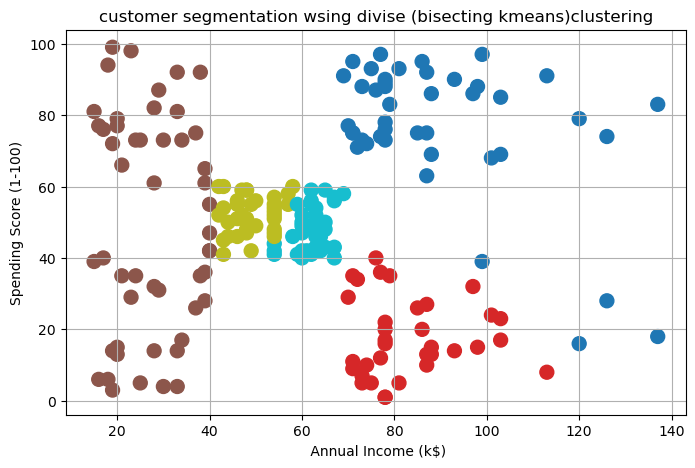

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df["DivisiveCluster"],cmap="tab10",s=100)
plt.title("customer segmentation wsing divise (bisecting kmeans)clustering")
plt.xlabel(" Annual Income (k$)")
plt.ylabel ("Spending Score (1-100)")
plt.grid(True)
plt.show()

In [24]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),DivisiveCluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,5
3,4,Female,23,16,77,5
4,5,Female,31,17,40,5


In [28]:
from sklearn.cluster import AgglomerativeClustering
hac_model=AgglomerativeClustering(n_clusters=5,linkage="ward")
hac_labels=hac_model.fit_predict(x_scaled)
df["HAC_Cluster"]=hac_labels
df["HDC_Cluster"]=bisecting_kmeans(x_scaled,max_clusters=5)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

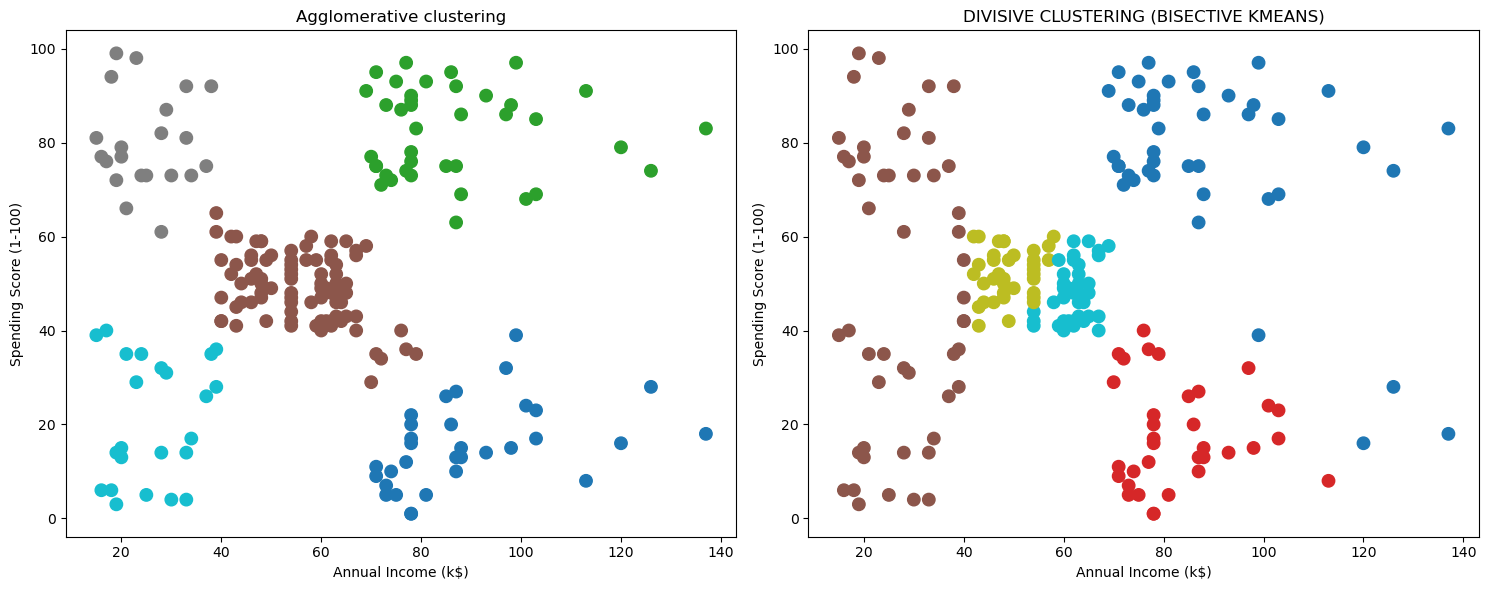

In [44]:
fig,axes=plt.subplots(1,2,figsize=(15,6))


#hac plot

axes[0].scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df["HAC_Cluster"],cmap="tab10",s=80)
axes[0].set_title("Agglomerative clustering")
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Spending Score (1-100)")


#hdc plot

axes[1].scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df["HDC_Cluster"],cmap="tab10",s=80)
axes[1].set_title("DIVISIVE CLUSTERING (BISECTIVE KMEANS)")
axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Spending Score (1-100)")

plt.tight_layout()
plt.show(
    
)

In [30]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),DivisiveCluster,HAC_Cluster,HDC_Cluster
0,1,Male,19,15,39,5,4,5
1,2,Male,21,15,81,5,3,5
2,3,Female,20,16,6,5,4,5
3,4,Female,23,16,77,5,3,5
4,5,Female,31,17,40,5,4,5
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1,2
196,197,Female,45,126,28,2,0,2
197,198,Male,32,126,74,2,1,2
198,199,Male,32,137,18,2,0,2
